#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
data = pd.read_csv('WineQT.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### Data Exploration

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

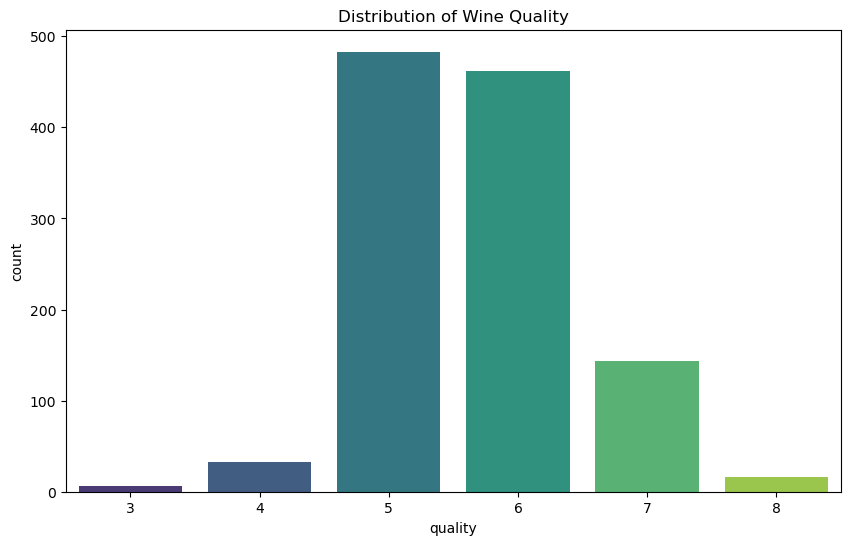

In [5]:
# Check the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.show()

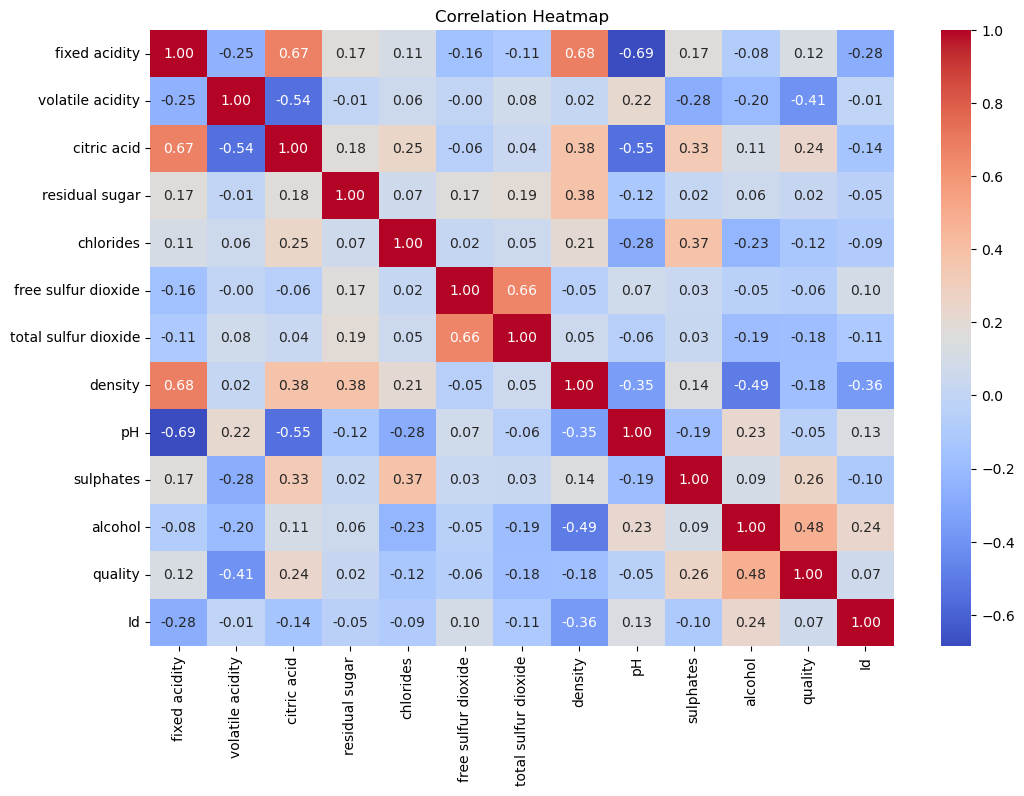

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

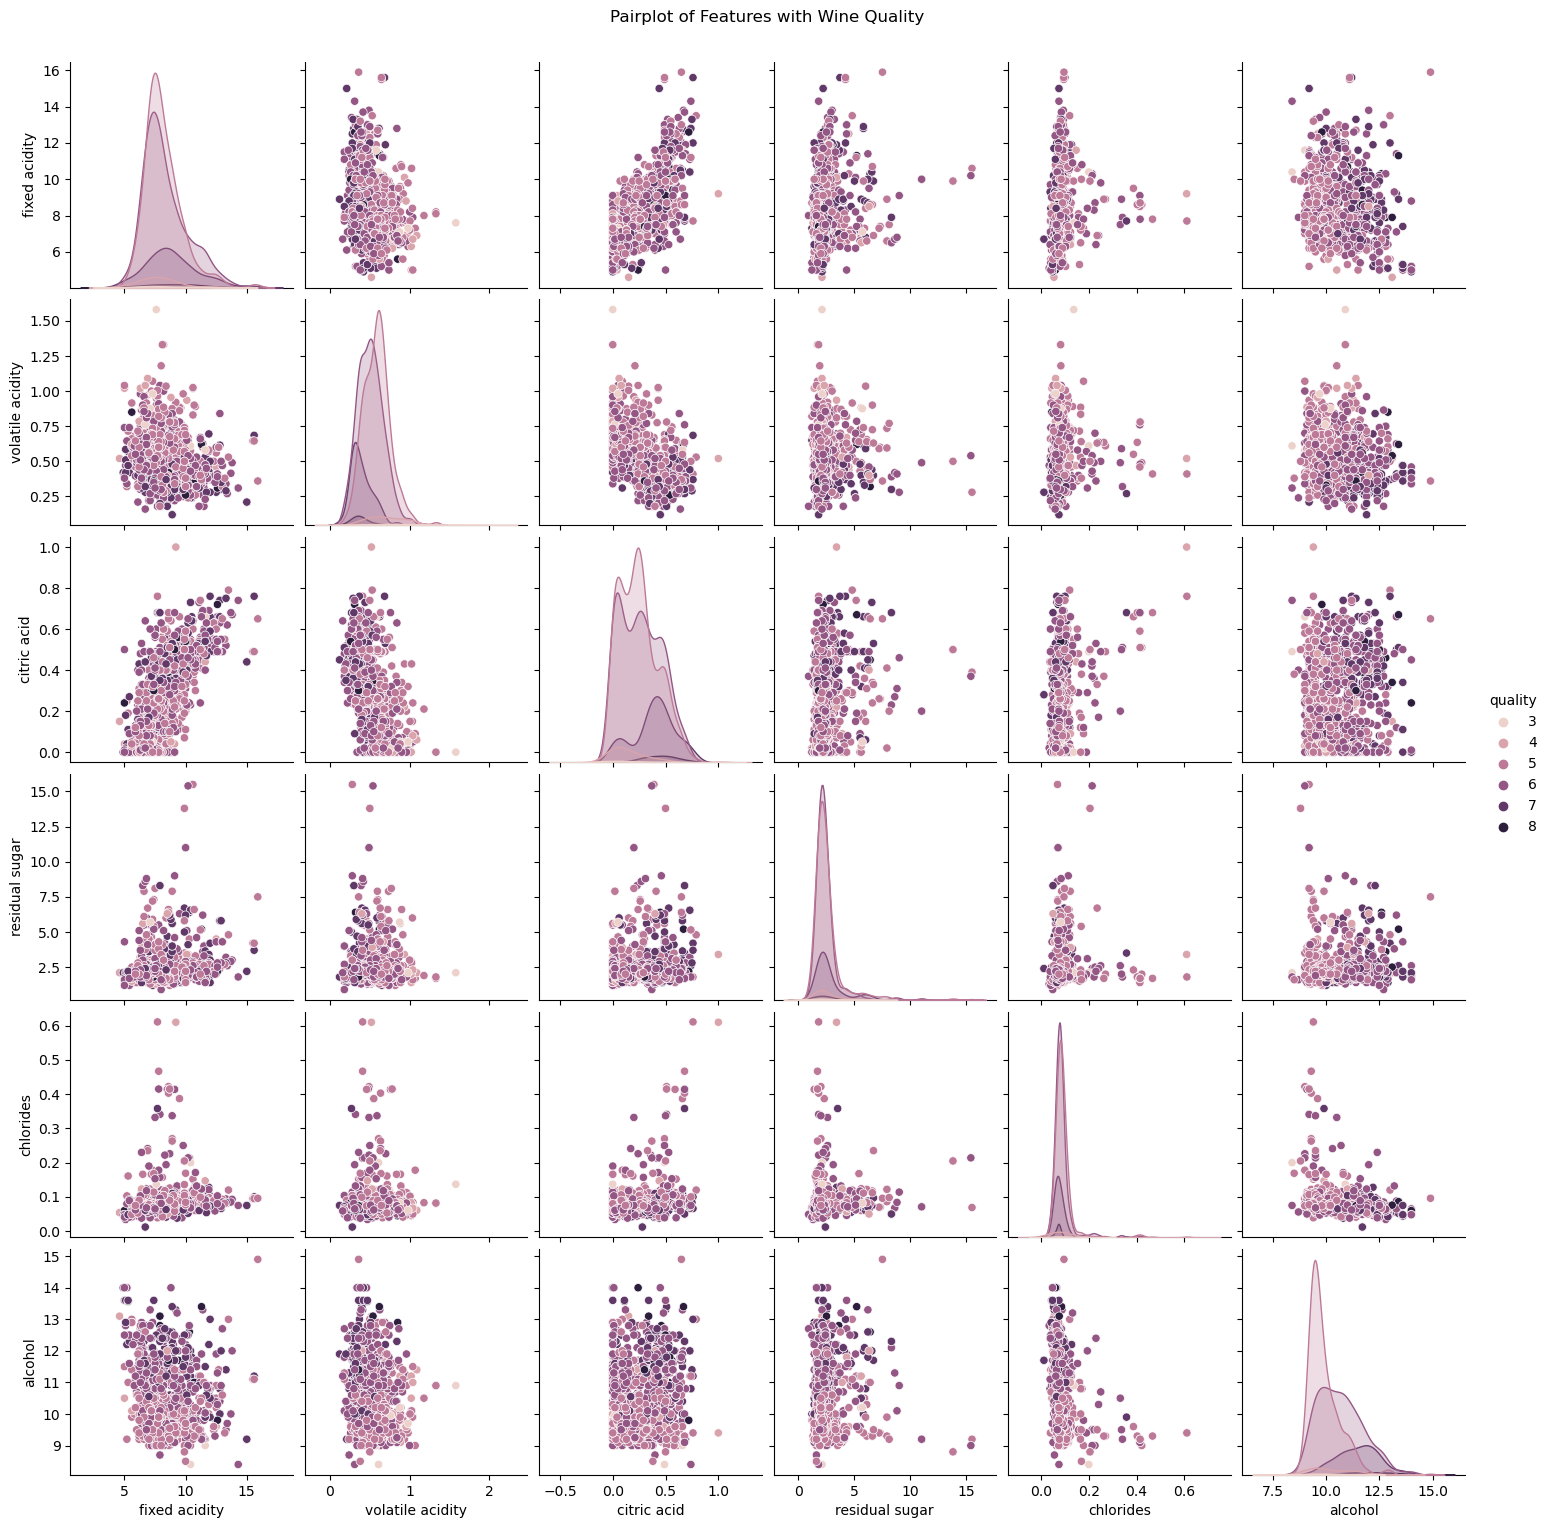

In [7]:
# Pairplot to visualize relationships between numeric features and wine quality
sns.pairplot(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol', 'quality']], hue='quality')
plt.suptitle("Pairplot of Features with Wine Quality", y=1.02)
plt.show()

#### Data Preprocessing

In [8]:
# Remove 'Id' column as it's not useful for prediction
data = data.drop(columns=['Id'])

In [9]:
# Feature Selection (X) and Target Variable (y)
X = data.drop(columns=['quality'])
y = data['quality']

In [10]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Model Training

In [12]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [13]:
# 2. Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)

In [14]:
# 3. Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

#### Evaluation

In [15]:
# Accuracy scores
rf_acc = accuracy_score(y_test, rf_pred)
sgd_acc = accuracy_score(y_test, sgd_pred)
svc_acc = accuracy_score(y_test, svc_pred)

In [16]:
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SGD Classifier Accuracy: {sgd_acc:.4f}")
print(f"SVC Accuracy: {svc_acc:.4f}")

Random Forest Accuracy: 0.6943
SGD Classifier Accuracy: 0.6026
SVC Accuracy: 0.6376


In [17]:
# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229



In [18]:
print("\nSGD Classifier Classification Report:")
print(classification_report(y_test, sgd_pred))


SGD Classifier Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.66      0.68      0.67        96
           6       0.62      0.67      0.64        99
           7       0.55      0.23      0.32        26
           8       0.10      0.50      0.17         2

    accuracy                           0.60       229
   macro avg       0.32      0.35      0.30       229
weighted avg       0.60      0.60      0.59       229



In [19]:
print("\nSVC Classification Report:")
print(classification_report(y_test, svc_pred))


SVC Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



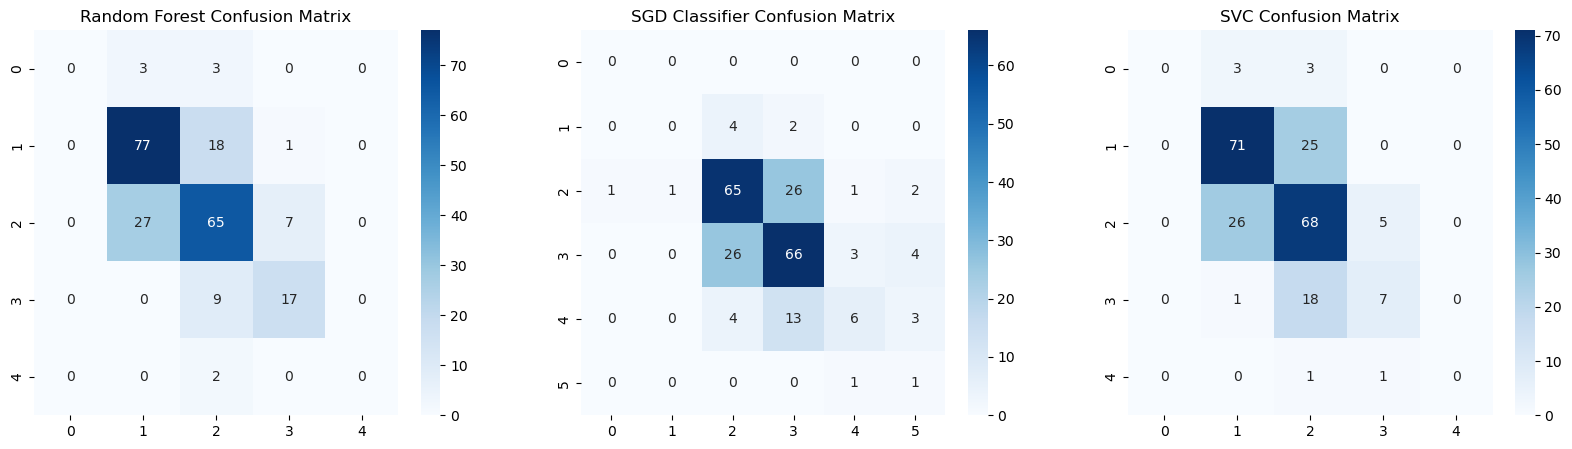

In [20]:
# Confusion Matrices
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('Random Forest Confusion Matrix')

# SGD Confusion Matrix
sns.heatmap(confusion_matrix(y_test, sgd_pred), annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('SGD Classifier Confusion Matrix')

# SVC Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt="d", cmap="Blues", ax=axs[2])
axs[2].set_title('SVC Confusion Matrix')

plt.show()

In [21]:
# Feature Importance for Random Forest
feature_importance = rf_model.feature_importances_
features = X.columns

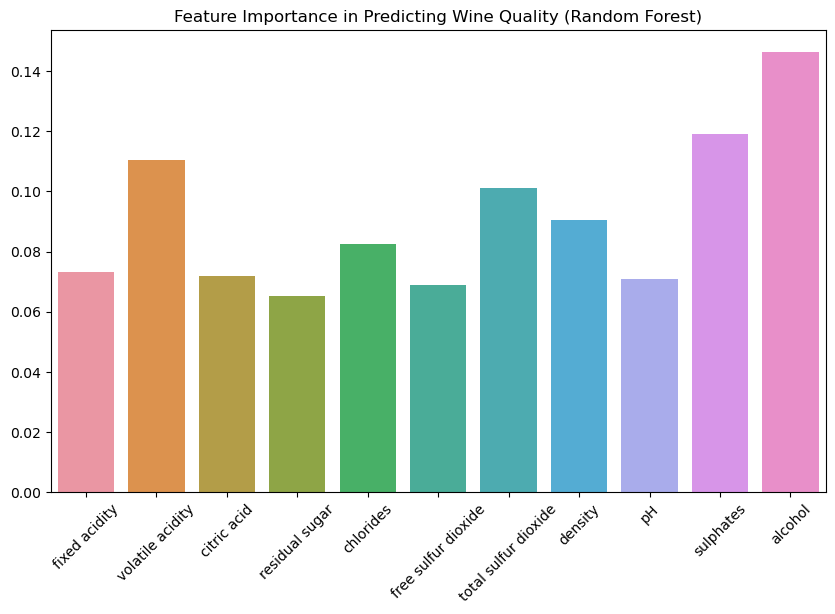

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance in Predicting Wine Quality (Random Forest)")
plt.show()

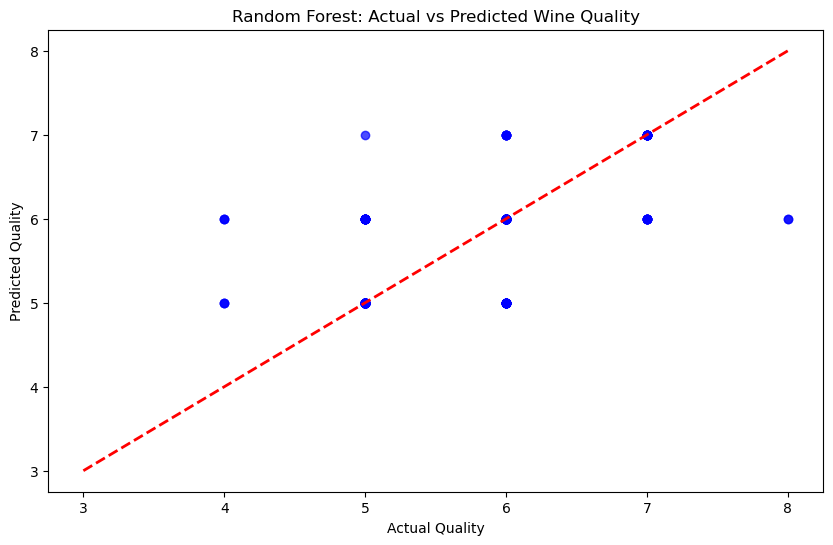

In [23]:
# Visualize the model performance: Predicted vs Actual for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='r')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted Wine Quality")
plt.show()